PART 01


1.1 ). Estimatation the value function for each of the states solving the system of Bellman equations explicitly

Bellman Equations Solution for Value Function:
[[ 2.17100208  4.7336156   2.07028049  1.26529444  1.77912239]
 [ 1.1180732   1.7821227   1.17409573  0.739174    0.56246548]
 [ 0.16279444  0.47788999  0.35198379  0.11045592 -0.18617038]
 [-0.54699155 -0.28473257 -0.28040463 -0.43990985 -0.7443105 ]
 [-1.10787684 -0.84936779 -0.80799244 -0.93799278 -1.23723244]]


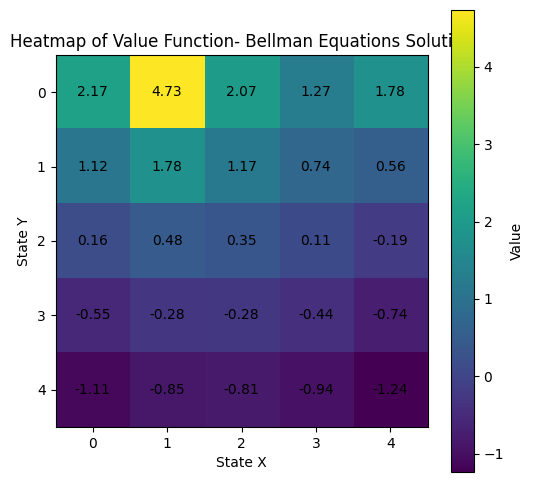

In [22]:
import numpy as np  
import matplotlib.pyplot as plt

# Define the gridworld size and discount factor
grid_world_size = 5  # Grid size is 5x5
gamma = 0.95  # Discount factor for future rewards

# Define the rewards and transitions
rewards = np.zeros((grid_world_size, grid_world_size))  # Initialize rewards matrix with zeros
rewards[0, 1] = 5   # Set reward for the blue square
rewards[0, 4] = 2.5  # Set reward for the green square

# Define transitions for special squares
# Each entry is a tuple (reward, next_state)
transitions = {}
transitions[(0, 1)] = [(5, (3, 2))]   # Blue -> Red
transitions[(0, 4)] = [(2.5, (3, 2)), (2.5, (4, 4))]  # Green -> Red or Yellow

# Define the four possible actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Actions represent movements: up, down, left, right

# Create the system of equations
num_states = grid_world_size * grid_world_size  # Total number of states in the grid
K = np.zeros((num_states, num_states))  # Initialize matrix A for Bellman equations
L = np.zeros(num_states)  # Initialize vector b for Bellman equations

# Function to get the state index from (i, j)
def get_state_index(i, j):
    return i * grid_world_size + j  # Convert 2D grid coordinates to 1D state index

# Function to get the next state and reward
def get_next_state_reward(state, action):
    if state in transitions:
        # Special squares with specific transitions
        transition = transitions[state]
        idx = np.random.choice(len(transition))  # Randomly choose one of the possible transitions
        return transition[idx]
    else:
        # Normal transitions
        next_state = (state[0] + action[0], state[1] + action[1])
        if next_state[0] < 0 or next_state[0] >= grid_world_size or next_state[1] < 0 or next_state[1] >= grid_world_size:
            return (-0.5, state)  # Stepping off the grid
        return (0, next_state)  # Normal move

# Build the matrix K and vector L
for i in range(grid_world_size):
    for j in range(grid_world_size):
        state_idx = get_state_index(i, j)  # Get 1D state index for (i, j)
        if (i, j) in transitions:
            for action in actions:
                reward, next_state = get_next_state_reward((i, j), action)
                next_state_idx = get_state_index(next_state[0], next_state[1])
                K[state_idx, next_state_idx] -= gamma / 4  # Adjust matrix A for special transitions
            L[state_idx] = rewards[i, j]  # Set corresponding reward in vector b
        else:
            for action in actions:
                reward, next_state = get_next_state_reward((i, j), action)
                next_state_idx = get_state_index(next_state[0], next_state[1])
                K[state_idx, next_state_idx] -= gamma / 4  # Adjust matrix A for normal transitions
                L[state_idx] += reward / 4  # Average reward contribution from all actions

# Add identity matrix to A for the equation V(s) = RHS
K += np.eye(num_states)  # Ensure diagonal dominance in matrix A

# Solve the system of equations
V_bellman = np.linalg.solve(K, L)  # Solve for value function using linear algebra

# Reshape the value function to grid form
V_bellman_grid = V_bellman.reshape((grid_world_size, grid_world_size))  # Convert 1D value array to 2D grid

print("Bellman Equations Solution for Value Function:")
print(V_bellman_grid)  # Display the computed value function for the grid

# Create heatmap
plt.figure(figsize=(6, 6))
plt.imshow(V_bellman_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of Value Function- Bellman Equations Solution')
plt.xlabel('State X')
plt.ylabel('State Y')

# Annotate the heatmap with values
for i in range(grid_world_size):
    for j in range(grid_world_size):
        plt.text(j, i, f'{V_bellman_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()


1.2 ). Estimatation the value function for each of the states using iterative policy evaluation

Iterative Policy Evaluation for Value Function:
[[ 2.17106167  4.73356968  2.07007691  1.26509157  1.77903674]
 [ 1.11812089  1.78206863  1.17393876  0.73898219  0.56228794]
 [ 0.16288173  0.47788332  0.35188381  0.11029994 -0.18634548]
 [-0.54685011 -0.28468338 -0.28044828 -0.44001921 -0.74445037]
 [-1.10770126 -0.84928557 -0.8080041  -0.93807386 -1.2373476 ]]


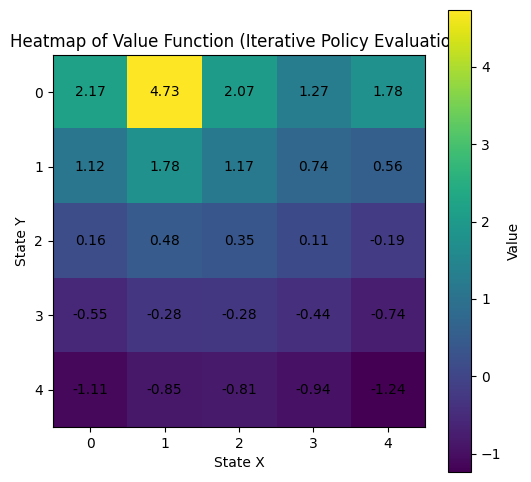

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gridworld size and discount factor
grid_size = 5  # Grid size is 5x5
gamma = 0.95  # Discount factor for future rewards

# Define the rewards and transitions
rewards = np.zeros((grid_size, grid_size))  # Initialize rewards matrix with zeros
rewards[0, 1] = 5   # Set reward for the blue square
rewards[0, 4] = 2.5  # Set reward for the green square

# Define transitions for special squares
# Each entry is a tuple (reward, next_state)
transitions = {}
transitions[(0, 1)] = [(5, (3, 2))]   # Blue -> Red
transitions[(0, 4)] = [(2.5, (3, 2)), (2.5, (4, 4))]  # Green -> Red or Yellow

# Define the four possible actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Actions represent movements: up, down, left, right

# Initialize the value function
V = np.zeros((grid_size, grid_size))  # Initialize value function with zeros

# Function to get the next state and reward
def get_next_state_reward(state, action):
    if state in transitions:
        # Special squares with specific transitions
        transition = transitions[state]
        idx = np.random.choice(len(transition))  # Randomly choose one of the possible transitions
        return transition[idx]
    else:
        # Normal transitions
        next_state = (state[0] + action[0], state[1] + action[1])
        if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
            return (-0.5, state)  # Stepping off the grid
        return (0, next_state)  # Normal move

# Iterative Policy Evaluation
def iterative_policy_evaluation(V, policy, theta=1e-4):
    while True:
        delta = 0  # Initialize delta for convergence check
        for i in range(grid_size):
            for j in range(grid_size):
                v = V[i, j]  # Store the current value
                new_v = 0  # Initialize new value
                for action in actions:
                    reward, next_state = get_next_state_reward((i, j), action)
                    new_v += 0.25 * (reward + gamma * V[next_state])  # Update new value with action probability
                V[i, j] = new_v  # Update the value function
                delta = max(delta, abs(v - new_v))  # Update delta
        if delta < theta:  # Check for convergence
            break
    return V

# Initialize policy (equal probability for all actions)
policy = np.ones((grid_size, grid_size, len(actions))) / len(actions)

# Perform Iterative Policy Evaluation
V_iterative = iterative_policy_evaluation(V.copy(), policy)

print("Iterative Policy Evaluation for Value Function:")
print(V_iterative)

# Create heatmap
plt.figure(figsize=(6, 6))
plt.imshow(V_iterative, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of Value Function (Iterative Policy Evaluation)')
plt.xlabel('State X')
plt.ylabel('State Y')

# Annotate the heatmap with values
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, f'{V_iterative[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()


1.3 ). Estimatation the value function for each of the states using value iteration

Value Iteration Solution for Value Function:
[[20.99700533 22.10219208 20.99708247 19.94722835 19.60219208]
 [19.94715507 20.99708247 19.94722835 18.94986693 18.62208247]
 [18.94979731 19.94722835 18.94986693 18.00237358 17.69097835]
 [18.00230745 18.94986693 18.00237358 17.10225491 16.80642943]
 [17.10219208 18.00237358 17.10225491 16.24714216 15.96610796]]


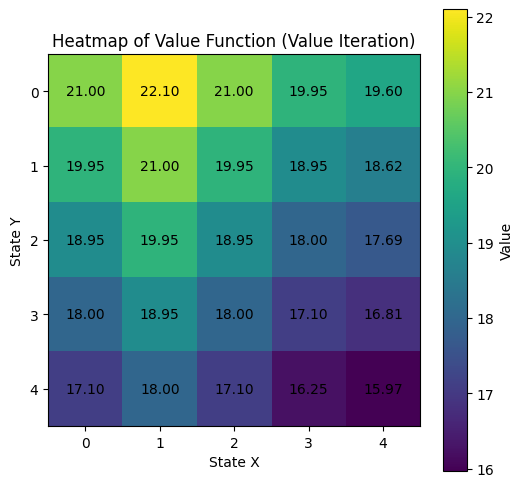

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gridworld size and discount factor
grid_size = 5  # Grid size is 5x5
gamma = 0.95  # Discount factor for future rewards

# Define the rewards and transitions
rewards = np.zeros((grid_size, grid_size))  # Initialize rewards matrix with zeros
rewards[0, 1] = 5   # Set reward for the blue square
rewards[0, 4] = 2.5  # Set reward for the green square

# Define transitions for special squares
# Each entry is a tuple (reward, next_state)
transitions = {}
transitions[(0, 1)] = [(5, (3, 2))]   # Blue -> Red
transitions[(0, 4)] = [(2.5, (3, 2)), (2.5, (4, 4))]  # Green -> Red or Yellow

# Define the four possible actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Actions represent movements: up, down, left, right

# Initialize the value function
V = np.zeros((grid_size, grid_size))  # Initialize value function with zeros

# Function to get the next state and reward
def get_next_state_reward(state, action):
    if state in transitions:
        # Special squares with specific transitions
        transition = transitions[state]
        idx = np.random.choice(len(transition))  # Randomly choose one of the possible transitions
        return transition[idx]
    else:
        # Normal transitions
        next_state = (state[0] + action[0], state[1] + action[1])
        if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
            return (-0.5, state)  # Stepping off the grid
        return (0, next_state)  # Normal move

# Value Iteration
def value_iteration(V, theta=1e-4):
    while True:
        delta = 0  # Initialize delta for convergence check
        for i in range(grid_size):
            for j in range(grid_size):
                v = V[i, j]  # Store the current value
                max_v = -float('inf')  # Initialize maximum value for the state
                for action in actions:
                    reward, next_state = get_next_state_reward((i, j), action)
                    new_v = reward + gamma * V[next_state]  # Calculate the new value
                    if new_v > max_v:
                        max_v = new_v  # Update maximum value
                V[i, j] = max_v  # Update the value function
                delta = max(delta, abs(v - max_v))  # Update delta
        if delta < theta:  # Check for convergence
            break
    return V

# Perform Value Iteration
V_value_iteration = value_iteration(V.copy())

print("Value Iteration Solution for Value Function:")
print(V_value_iteration)

# Create heatmap
plt.figure(figsize=(6, 6))
plt.imshow(V_value_iteration, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of Value Function (Value Iteration)')
plt.xlabel('State X')
plt.ylabel('State Y')

# Annotate the heatmap with values
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, f'{V_value_iteration[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()


2.1 ). Optimal policy for the gridworld problem by explicitly solving the Bellman optimality equation

Optimal Value Function by Solving Bellman Optimality Equation:
[[20.99734295 22.10246707 20.99734371 19.94747653 19.60246707]
 [19.9474758  20.99734371 19.94747653 18.9501027  18.62234371]
 [18.95010201 19.94747653 18.9501027  18.00259757 17.69122653]
 [18.00259691 18.9501027  18.00259757 17.10246769 16.8066652 ]
 [17.10246707 18.00259757 17.10246769 16.2473443  15.96633194]]
Optimal Policy:
→ ↑ ← ← ↓
↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑


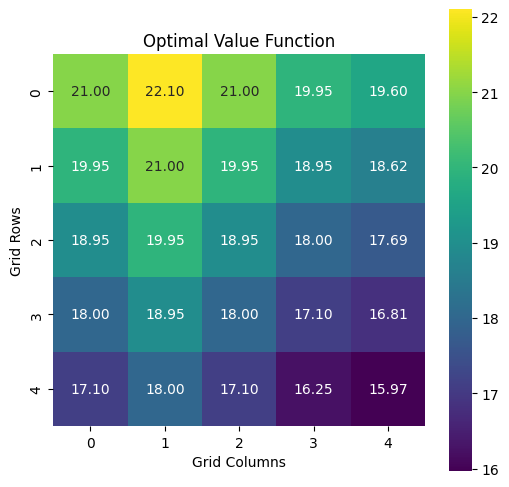

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the gridworld size and discount factor
grid_size = 5  # Grid size is 5x5
gamma = 0.95  # Discount factor for future rewards

# Define the rewards and transitions
rewards = np.zeros((grid_size, grid_size))  # Initialize rewards matrix with zeros
rewards[0, 1] = 5   # Set reward for the blue square
rewards[0, 4] = 2.5  # Set reward for the green square

# Define transitions for special squares
# Each entry is a tuple (reward, next_state)
transitions = {}
transitions[(0, 1)] = [(5, (3, 2))]   # Blue -> Red
transitions[(0, 4)] = [(2.5, (3, 2)), (2.5, (4, 4))]  # Green -> Red or Yellow

# Define the four possible actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Actions represent movements: up, down, left, right
action_indices = {(-1, 0): 0, (1, 0): 1, (0, -1): 2, (0, 1): 3}  # Map actions to indices

# Function to get the next state and reward
def get_next_state_reward(state, action):
    if state in transitions:
        # Special squares with specific transitions
        transition = transitions[state]
        idx = np.random.choice(len(transition))  # Randomly choose one of the possible transitions
        return transition[idx]
    else:
        # Normal transitions
        next_state = (state[0] + action[0], state[1] + action[1])
        if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
            return (-0.5, state)  # Stepping off the grid
        return (0, next_state)  # Normal move

# Bellman Optimality Equation
def solve_bellman_optimality(V, theta=1e-6):
    policy = np.zeros((grid_size, grid_size), dtype=int)  # Initialize policy with zeros
    while True:
        delta = 0  # Initialize delta for convergence check
        for i in range(grid_size):
            for j in range(grid_size):
                v = V[i, j]  # Store the current value
                max_v = -float('inf')  # Initialize maximum value
                best_action = None
                for action in actions:
                    reward, next_state = get_next_state_reward((i, j), action)
                    next_value = reward + gamma * V[next_state]  # Calculate the next value
                    if next_value > max_v:
                        max_v = next_value  # Update maximum value
                        best_action = action  # Update best action
                V[i, j] = max_v  # Update value function
                policy[i, j] = action_indices[best_action]  # Update policy with the best action index
                delta = max(delta, abs(v - max_v))  # Update delta
        if delta < theta:  # Check for convergence
            break
    return V, policy

# Solve the Bellman optimality equation
V_optimal, optimal_policy = solve_bellman_optimality(np.zeros((grid_size, grid_size)))

print("Optimal Value Function by Solving Bellman Optimality Equation:")
print(V_optimal)

# Print the optimal policy using text
action_symbols = {0: '↑', 1: '↓', 2: '←', 3: '→'}
print("Optimal Policy:")
for i in range(grid_size):
    row = []
    for j in range(grid_size):
        row.append(action_symbols[optimal_policy[i, j]])
    print(" ".join(row))

# Function to plot the value function as a heatmap
def plot_values(V, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(V, annot=True, cmap='viridis', cbar=True, square=True, fmt=".2f")
    plt.title(title)
    plt.xlabel('Grid Columns')
    plt.ylabel('Grid Rows')
    plt.show()

# Plot the optimal value function and policy
plot_values(V_optimal, "Optimal Value Function")



2.2 ). Optimal policy for the gridworld problem by explicitly using policy iteration with iterative policy evaluation

Optimal Value Function by Policy Iteration:
[[20.99734629 22.10246979 20.9973463  19.94747898 19.60246979]
 [19.94747897 20.9973463  19.94747898 18.95010503 18.6223463 ]
 [18.95010503 19.94747898 18.95010503 18.00259978 17.69122898]
 [18.00259977 18.95010503 18.00259978 17.10246979 16.80666753]
 [17.10246979 18.00259978 17.10246979 16.2473463  15.96633416]]
Optimal Policy:
→ ↑ ← ← ↑
→ ↑ ↑ ↑ ↑
→ ↑ ↑ ↑ ↑
→ ↑ ↑ ↑ ↑
→ ↑ ↑ ↑ ↑


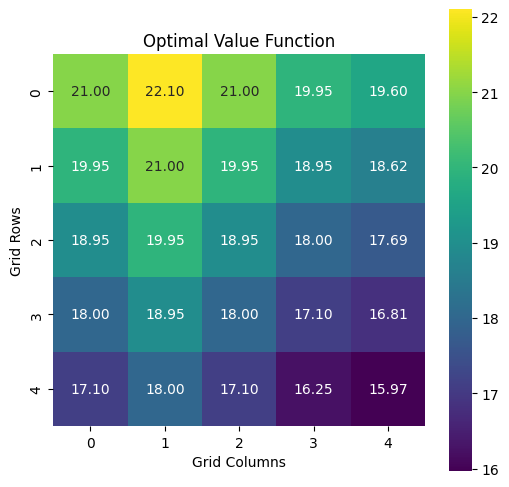

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the gridworld size and discount factor
grid_size = 5  # Grid size is 5x5
gamma = 0.95  # Discount factor for future rewards

# Define the rewards and transitions
rewards = np.zeros((grid_size, grid_size))  # Initialize rewards matrix with zeros
rewards[0, 1] = 5   # Set reward for the blue square
rewards[0, 4] = 2.5  # Set reward for the green square

# Define transitions for special squares
# Each entry is a tuple (reward, next_state)
transitions = {}
transitions[(0, 1)] = [(5, (3, 2))]   # Blue -> Red
transitions[(0, 4)] = [(2.5, (3, 2)), (2.5, (4, 4))]  # Green -> Red or Yellow

# Define the four possible actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Actions: up, down, left, right
action_indices = {(-1, 0): 0, (1, 0): 1, (0, -1): 2, (0, 1): 3}  # Map actions to indices

# Function to get the next state and reward
def get_next_state_reward(state, action):
    if state in transitions:
        # Special squares with specific transitions
        transition = transitions[state]
        idx = np.random.choice(len(transition))  # Randomly choose one of the possible transitions
        return transition[idx]
    else:
        # Normal transitions
        next_state = (state[0] + action[0], state[1] + action[1])
        if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
            return (-0.5, state)  # Stepping off the grid
        return (0, next_state)  # Normal move

# Policy Evaluation
def policy_evaluation(policy, V, theta=1e-6):
    while True:
        delta = 0  # Initialize delta for convergence check
        for i in range(grid_size):
            for j in range(grid_size):
                v = V[i, j]  # Store the current value
                action = actions[policy[i, j]]  # Get the action from the policy
                reward, next_state = get_next_state_reward((i, j), action)
                V[i, j] = reward + gamma * V[next_state]  # Update the value function
                delta = max(delta, abs(v - V[i, j]))  # Update delta
        if delta < theta:  # Check for convergence
            break
    return V

# Policy Improvement
def policy_improvement(V, policy):
    policy_stable = True  # Initialize policy stability flag
    for i in range(grid_size):
        for j in range(grid_size):
            old_action = policy[i, j]  # Store the current policy action
            max_v = -float('inf')  # Initialize maximum value
            best_action = None  # Initialize best action
            for action in actions:
                reward, next_state = get_next_state_reward((i, j), action)
                next_value = reward + gamma * V[next_state]  # Calculate the next value
                if next_value > max_v:
                    max_v = next_value  # Update maximum value
                    best_action = action  # Update best action
            policy[i, j] = action_indices[best_action]  # Update policy with the best action index
            if old_action != policy[i, j]:  # Check if policy has changed
                policy_stable = False
    return policy, policy_stable

# Policy Iteration
def policy_iteration():
    # Initialize the value function and policy
    V = np.zeros((grid_size, grid_size))
    policy = np.zeros((grid_size, grid_size), dtype=int)

    while True:
        V = policy_evaluation(policy, V)  # Evaluate the current policy
        policy, policy_stable = policy_improvement(V, policy)  # Improve the policy
        if policy_stable:  # Check if the policy is stable
            break

    return V, policy

# Perform Policy Iteration
optimal_value_function, optimal_policy = policy_iteration()

print("Optimal Value Function by Policy Iteration:")
print(optimal_value_function)

# Print the optimal policy using text
action_symbols = {0: '↑', 1: '↓', 2: '←', 3: '→'}
print("Optimal Policy:")
for i in range(grid_size):
    row = []
    for j in range(grid_size):
        row.append(action_symbols[optimal_policy[i, j]])
    print(" ".join(row))

# Function to plot the value function as a heatmap
def plot_values(V, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(V, annot=True, cmap='viridis', cbar=True, square=True, fmt=".2f")
    plt.title(title)
    plt.xlabel('Grid Columns')
    plt.ylabel('Grid Rows')
    plt.show()

# Plot the optimal value function and policy
plot_values(optimal_value_function, "Optimal Value Function")


2.3 ). Optimal policy for the gridworld problem by explicitly using policy improvement with value iteration

Optimal Value Function by Value Iteration:
[[20.99734371 22.10246769 20.9973443  19.94747709 19.60246769]
 [19.94747653 20.9973443  19.94747709 18.95010323 18.6223443 ]
 [18.9501027  19.94747709 18.95010323 18.00259807 17.69122709]
 [18.00259757 18.95010323 18.00259807 17.10246817 16.80666573]
 [17.10246769 18.00259807 17.10246817 16.24734476 15.96633245]]
Optimal Policy:
→ ↑ ← ← ↑
→ ↑ ↑ ↑ ↑
→ ↑ ↑ ↑ ↑
→ ↑ ↑ ↑ ↑
→ ↑ ↑ ↑ ↑


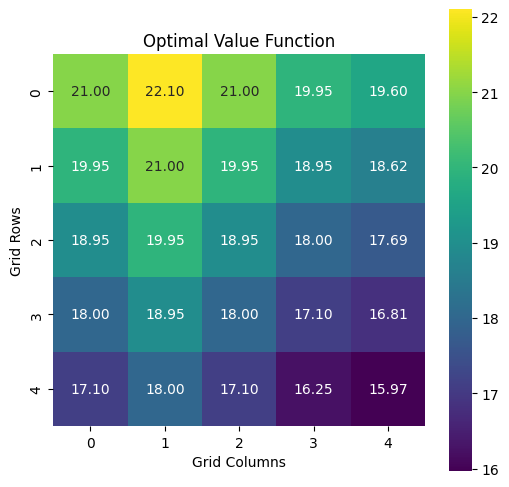

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the gridworld size and discount factor
grid_size = 5  # Grid size is 5x5
gamma = 0.95  # Discount factor for future rewards

# Define the rewards and transitions
rewards = np.zeros((grid_size, grid_size))  # Initialize rewards matrix with zeros
rewards[0, 1] = 5   # Set reward for the blue square
rewards[0, 4] = 2.5  # Set reward for the green square

# Define transitions for special squares
# Each entry is a tuple (reward, next_state)
transitions = {}
transitions[(0, 1)] = [(5, (3, 2))]   # Blue -> Red
transitions[(0, 4)] = [(2.5, (3, 2)), (2.5, (4, 4))]  # Green -> Red or Yellow

# Define the four possible actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Actions: up, down, left, right
action_indices = {(-1, 0): 0, (1, 0): 1, (0, -1): 2, (0, 1): 3}  # Map actions to indices

# Function to get the next state and reward
def get_next_state_reward(state, action):
    if state in transitions:
        # Special squares with specific transitions
        transition = transitions[state]
        idx = np.random.choice(len(transition))  # Randomly choose one of the possible transitions
        return transition[idx]
    else:
        # Normal transitions
        next_state = (state[0] + action[0], state[1] + action[1])
        if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
            return (-0.5, state)  # Stepping off the grid
        return (0, next_state)  # Normal move

# Value Iteration
def value_iteration(V, theta=1e-6):
    while True:
        delta = 0  # Initialize delta for convergence check
        for i in range(grid_size):
            for j in range(grid_size):
                v = V[i, j]  # Store the current value
                max_v = -float('inf')  # Initialize maximum value
                for action in actions:
                    reward, next_state = get_next_state_reward((i, j), action)
                    new_v = reward + gamma * V[next_state]  # Calculate the new value
                    if new_v > max_v:
                        max_v = new_v  # Update maximum value
                V[i, j] = max_v  # Update value function
                delta = max(delta, abs(v - max_v))  # Update delta
        if delta < theta:  # Check for convergence
            break
    return V

# Policy Improvement
def policy_improvement(V):
    policy = np.zeros((grid_size, grid_size), dtype=int)  # Initialize policy with zeros
    for i in range(grid_size):
        for j in range(grid_size):
            max_v = -float('inf')  # Initialize maximum value
            best_action = None  # Initialize best action
            for action in actions:
                reward, next_state = get_next_state_reward((i, j), action)
                next_value = reward + gamma * V[next_state]  # Calculate the next value
                if next_value > max_v:
                    max_v = next_value  # Update maximum value
                    best_action = action  # Update best action
            policy[i, j] = action_indices[best_action]  # Update policy with the best action index
    return policy

# Perform Value Iteration to find the optimal value function
V_optimal = value_iteration(np.zeros((grid_size, grid_size)))

# Perform Policy Improvement to find the optimal policy
optimal_policy = policy_improvement(V_optimal)

print("Optimal Value Function by Value Iteration:")
print(V_optimal)

# Print the optimal policy using text
action_symbols = {0: '↑', 1: '↓', 2: '←', 3: '→'}
print("Optimal Policy:")
for i in range(grid_size):
    row = []
    for j in range(grid_size):
        row.append(action_symbols[optimal_policy[i, j]])
    print(" ".join(row))

# Function to plot the value function as a heatmap
def plot_values(V, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(V, annot=True, cmap='viridis', cbar=True, square=True, fmt=".2f")
    plt.title(title)
    plt.xlabel('Grid Columns')
    plt.ylabel('Grid Rows')
    plt.show()

# Plot the optimal value function and policy
plot_values(V_optimal, "Optimal Value Function")

